In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp, odeint

/tmp/ipykernel_2440/3670907499.py:39: RuntimeWarning: invalid value encountered in log
  log_i_RK23 = np.log(res_RK23.y[2])
/tmp/ipykernel_2440/3670907499.py:40: RuntimeWarning: invalid value encountered in log
  log_i_DOP853 = np.log(res_DOP853.y[2])
/tmp/ipykernel_2440/3670907499.py:41: RuntimeWarning: invalid value encountered in log
  log_i_LSODA = np.log(res_LSODA.y[2])
/tmp/ipykernel_2440/3670907499.py:43: RuntimeWarning: invalid value encountered in log
  log_i_BDF = np.log(res_BDF.y[2])


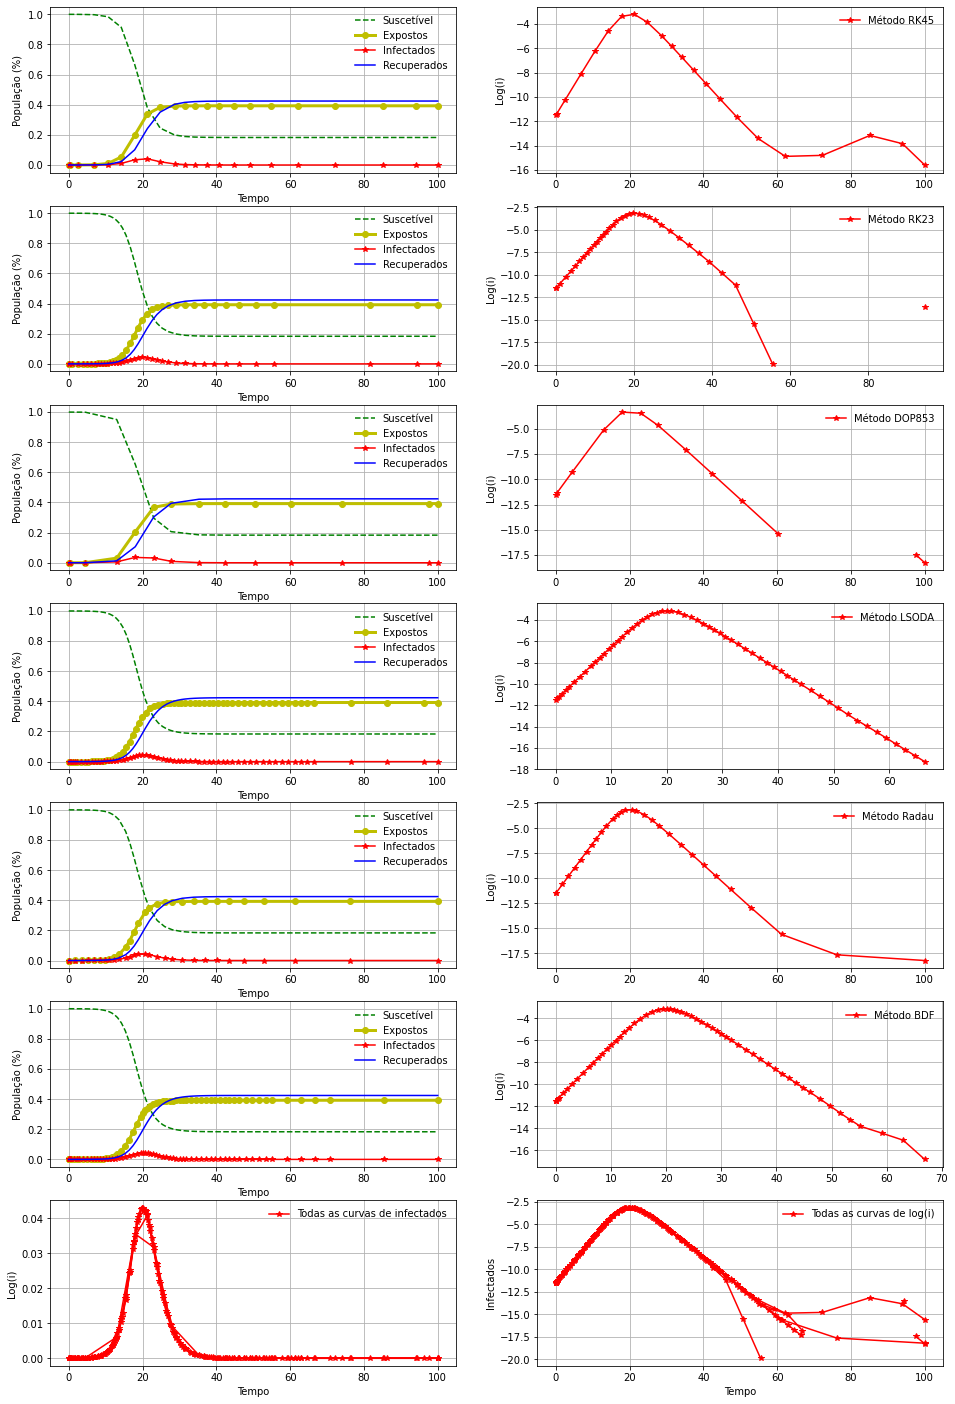

In [75]:
# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i - delta * s * i
    dedt = delta * s * i - alpha * e * i
    didt = R0 * s * i + alpha * e * i - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 1.5
alpha = 1
delta = R0 + 1
i0 = 1e-5

t0, t = 0, 100
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res_RK45 = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "RK45")

res_RK23 = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "RK23")

res_DOP853 = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "DOP853")

res_Radau = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "Radau")

res_BDF = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "BDF")

res_LSODA = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")

log_i_RK45 = np.log(res_RK45.y[2])
log_i_RK23 = np.log(res_RK23.y[2])
log_i_DOP853 = np.log(res_DOP853.y[2])
log_i_LSODA = np.log(res_LSODA.y[2])
log_i_Radau = np.log(res_Radau.y[2])
log_i_BDF = np.log(res_BDF.y[2])


# Plot.

fig, ax = plt.subplots(figsize=(16,25), nrows=7, ncols=2)

ax[0,0].plot(res_RK45.t, res_RK45.y[0], '--g', label='Suscetível')
ax[0,0].plot(res_RK45.t, res_RK45.y[1], 'o-y',lw=3, label='Expostos')
ax[0,0].plot(res_RK45.t, res_RK45.y[2], '*-r', label='Infectados')
ax[0,0].plot(res_RK45.t, res_RK45.y[3], '-b', label='Recuperados')
ax[0,1].plot(res_RK45.t, log_i_RK45, '*-r', label='Método RK45')

ax[1,0].plot(res_RK23.t, res_RK23.y[0], '--g', label='Suscetível')
ax[1,0].plot(res_RK23.t, res_RK23.y[1], 'o-y',lw=3, label='Expostos')
ax[1,0].plot(res_RK23.t, res_RK23.y[2], '*-r', label='Infectados')
ax[1,0].plot(res_RK23.t, res_RK23.y[3], '-b', label='Recuperados')
ax[1,1].plot(res_RK23.t, log_i_RK23, '*-r', label='Método RK23')

ax[2,0].plot(res_DOP853.t, res_DOP853.y[0], '--g', label='Suscetível')
ax[2,0].plot(res_DOP853.t, res_DOP853.y[1], 'o-y',lw=3, label='Expostos')
ax[2,0].plot(res_DOP853.t, res_DOP853.y[2], '*-r', label='Infectados')
ax[2,0].plot(res_DOP853.t, res_DOP853.y[3], '-b', label='Recuperados')
ax[2,1].plot(res_DOP853.t, log_i_DOP853, '*-r', label='Método DOP853')

ax[3,0].plot(res_LSODA.t, res_LSODA.y[0], '--g', label='Suscetível')
ax[3,0].plot(res_LSODA.t, res_LSODA.y[1], 'o-y',lw=3, label='Expostos')
ax[3,0].plot(res_LSODA.t, res_LSODA.y[2], '*-r', label='Infectados')
ax[3,0].plot(res_LSODA.t, res_LSODA.y[3], '-b', label='Recuperados')
ax[3,1].plot(res_LSODA.t, log_i_LSODA, '*-r', label='Método LSODA')

ax[4,0].plot(res_Radau.t, res_Radau.y[0], '--g', label='Suscetível')
ax[4,0].plot(res_Radau.t, res_Radau.y[1], 'o-y',lw=3, label='Expostos')
ax[4,0].plot(res_Radau.t, res_Radau.y[2], '*-r', label='Infectados')
ax[4,0].plot(res_Radau.t, res_Radau.y[3], '-b', label='Recuperados')
ax[4,1].plot(res_Radau.t, log_i_Radau, '*-r', label='Método Radau')

ax[5,0].plot(res_BDF.t, res_BDF.y[0], '--g', label='Suscetível')
ax[5,0].plot(res_BDF.t, res_BDF.y[1], 'o-y',lw=3, label='Expostos')
ax[5,0].plot(res_BDF.t, res_BDF.y[2], '*-r', label='Infectados')
ax[5,0].plot(res_BDF.t, res_BDF.y[3], '-b', label='Recuperados')
ax[5,1].plot(res_BDF.t, log_i_BDF, '*-r', label='Método BDF')

ax[6,0].plot(res_RK45.t, res_RK45.y[2], '*-r', label='Todas as curvas de infectados')
ax[6,0].plot(res_RK23.t, res_RK23.y[2], '*-r')
ax[6,0].plot(res_DOP853.t, res_DOP853.y[2], '*-r')
ax[6,0].plot(res_LSODA.t, res_LSODA.y[2], '*-r')
ax[6,0].plot(res_Radau.t, res_Radau.y[2], '*-r')
ax[6,0].plot(res_BDF.t, res_BDF.y[2], '*-r')

ax[6,1].plot(res_RK45.t, log_i_RK45, '*-r', label='Todas as curvas de log(i)')
ax[6,1].plot(res_RK23.t, log_i_RK23, '*-r')
ax[6,1].plot(res_DOP853.t, log_i_DOP853, '*-r')
ax[6,1].plot(res_LSODA.t, log_i_LSODA, '*-r')
ax[6,1].plot(res_Radau.t, log_i_Radau, '*-r')
ax[6,1].plot(res_BDF.t, log_i_BDF, '*-r')


for i in range(0,6):
    ax[i,0].set_xlabel('Tempo')
    ax[i,0].set_ylabel('População (%)')
    ax[i,1].set_ylabel('Log(i)')
    ax[i,0].grid(True)
    ax[i,1].grid(True)
    ax[i,0].legend(frameon=False)
    ax[i,1].legend(frameon=False)

ax[6,0].set_xlabel('Tempo')
ax[6,0].set_ylabel('Log(i)')
ax[6,0].legend(frameon=False)
ax[6,0].grid(True)

ax[6,1].set_xlabel('Tempo')
ax[6,1].set_ylabel('Infectados')
ax[6,1].legend(frameon=False)
ax[6,1].grid(True)

In [76]:
sub = np.polynomial.polynomial.Polynomial.fit(res_LSODA.y[2][0:5], res_LSODA.t[0:5], 1)
print(sub)

des = np.polynomial.polynomial.Polynomial.fit(res_LSODA.y[2][15:50], res_LSODA.t[15:50], 1)
print(des)

0.9587411556705745 + 0.8710055311220405·x¹
24.06549620148464 - 9.705659923900438·x¹


# 

# #############################

In [77]:
# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i - delta * s * i
    dedt = delta * s * i - alpha * e * i
    didt = R0 * s * i + alpha * e * i - i
    drdt = i
    return dsdt, dedt, didt, drdt

alpha = 1
delta = R0 + 1
i0 = 1e-5

t0, t = 0, 100
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

t_discreto = np.linspace(t0,t,t)

lista = []

R0i = 1
R0f = 2
nR0 = 10

for i in np.linspace(R0i,R0f,nR0):
    res_LSODA = solve_ivp(seir, (t0, t), args=(alpha, i, delta), y0=[s0, e0, i0, r0], method = "LSODA", t_eval=t_discreto)
    lista.append([np.log(res_LSODA.y[2]), i])

/tmp/ipykernel_2440/3106420639.py:34: RuntimeWarning: invalid value encountered in log
  lista.append([np.log(res_LSODA.y[2]), i])


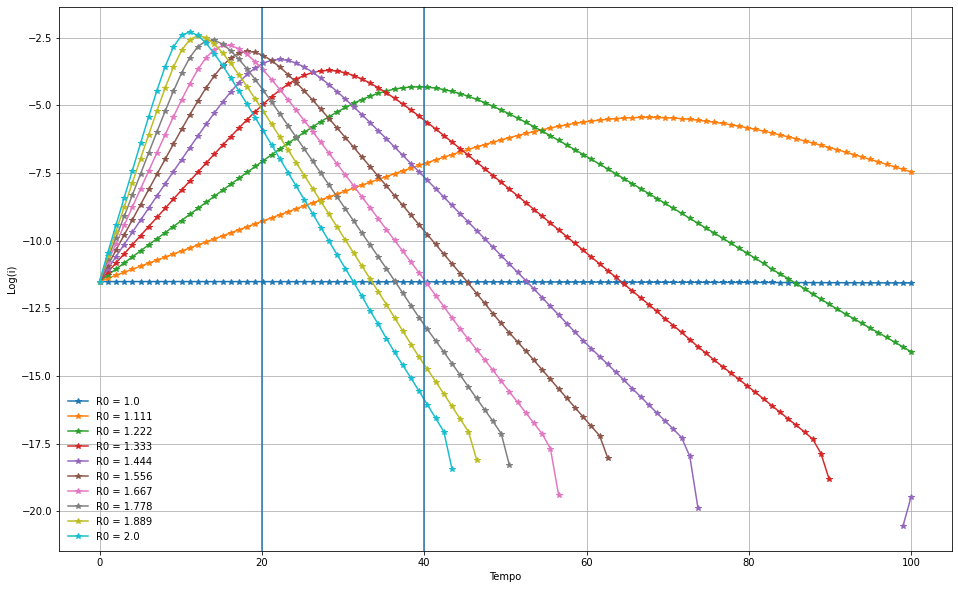

In [78]:
# Plot para a medição dos intervalos a serem considerados.

T0 = 20
T  = 40

fig, ax = plt.subplots(figsize=(16,10))
[ax.plot(t_discreto, lista[i][0], marker='*', label=f'R0 = {round(lista[i][1],3)}') for i in range(0,nR0)]

ax.axvline(x=T0)
ax.axvline(x=T)

ax.set_xlabel('Tempo')
ax.set_ylabel('Log(i)')
ax.grid(True)
ax.legend(frameon=False)

In [31]:
lista_coef_R0_subida = []
lista_coef_R0_descida = []

In [315]:
# R0 = 1.0 => inclinação = 0

R0 = 1.0
curva = 0
b_sub = b_des = 0

lista_coef_R0_subida.append([b_sub,R0])
lista_coef_R0_descida.append([b_des,R0])

In [316]:
# R0 = 1.1

R0 = 1.111
curva = 1



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente
T0_sub_1_111 = 5
T_sub_1_111 = 21

arr_sub = lista[curva][0][T0_sub_1_1:T_sub_1_111]

arr_t_sub = t_discreto[T0_sub_1_1:T_sub_1_111]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_111 = 85
T_des_1_111 = 98

arr_des = lista[1][0][T0_des_1_111:T_des_1_111]

arr_t_des = t_discreto[T0_des_1_111:T_des_1_111]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])


[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

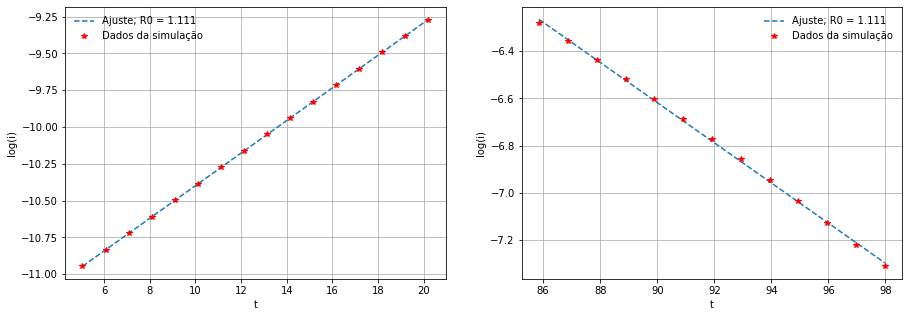

In [317]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]


In [318]:
# R0 = 1.222

R0 = 1.222
curva = 2



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_222 = 5
T_sub_1_222 = 21

arr_sub = lista[curva][0][T0_sub_1_222:T_sub_1_222]

arr_t_sub = t_discreto[T0_sub_1_222:T_sub_1_222]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_222 = 60
T_des_1_222 = 85

arr_des = lista[curva][0][T0_des_1_222:T_des_1_222]

arr_t_des = t_discreto[T0_des_1_222:T_des_1_222]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])


[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

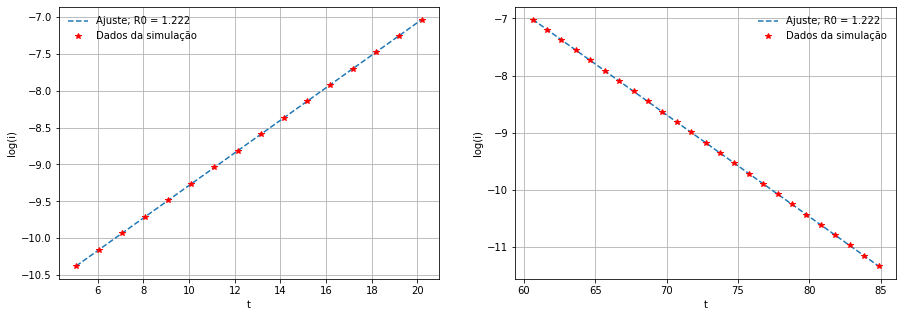

In [319]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

In [320]:
# R0 = 1.333

R0 = 1.333
curva = 3



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_333 = 5
T_sub_1_333 = 19

arr_sub = lista[curva][0][T0_sub_1_333:T_sub_1_333]

arr_t_sub = t_discreto[T0_sub_1_333:T_sub_1_333]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_333 = 50
T_des_1_333 = 80

arr_des = lista[curva][0][T0_des_1_333:T_des_1_333]

arr_t_des = t_discreto[T0_des_1_333:T_des_1_333]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

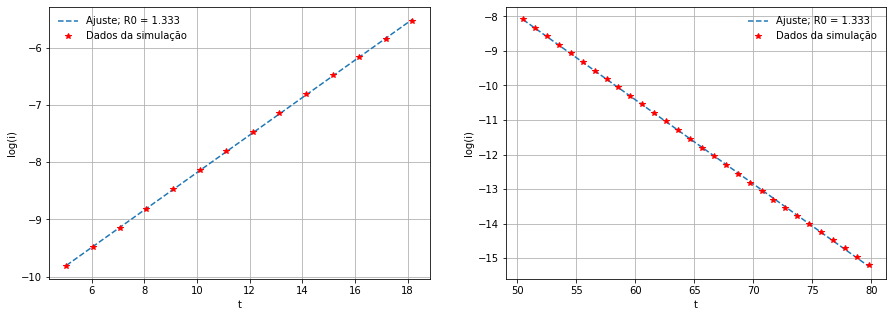

In [321]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

In [322]:
# R0 = 1.444

R0 = 1.444
curva = 4



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_444 = 3
T_sub_1_444 = 15

arr_sub = lista[curva][0][T0_sub_1_444:T_sub_1_444]

arr_t_sub = t_discreto[T0_sub_1_444:T_sub_1_444]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_444 = 35
T_des_1_444 = 60

arr_des = lista[curva][0][T0_des_1_444:T_des_1_444]

arr_t_des = t_discreto[T0_des_1_444:T_des_1_444]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

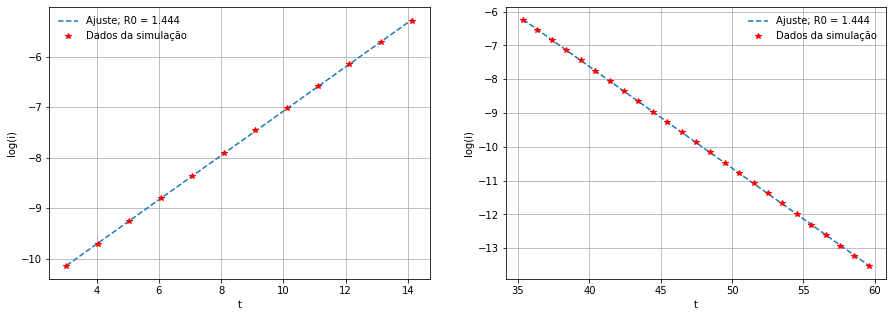

In [323]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

In [334]:
# R0 = 1.556

R0 = 1.556
curva = 5



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_556 = 2
T_sub_1_556 = 11

arr_sub = lista[curva][0][T0_sub_1_556:T_sub_1_556]

arr_t_sub = t_discreto[T0_sub_1_556:T_sub_1_556]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_556 = 30
T_des_1_556 = 55

arr_des = lista[curva][0][T0_des_1_556:T_des_1_556]

arr_t_des = t_discreto[T0_des_1_556:T_des_1_556]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])


[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

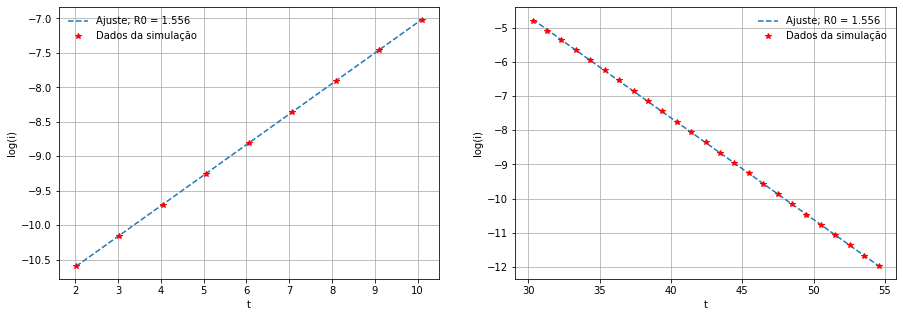

In [335]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]
    

In [32]:
# R0 = 1.667

R0 = 1.667
curva = 6



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_667 = 2
T_sub_1_667 = 11

arr_sub = lista[curva][0][T0_sub_1_667:T_sub_1_667]

arr_t_sub = t_discreto[T0_sub_1_667:T_sub_1_667]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_667 = 30
T_des_1_667 = 55

arr_des = lista[curva][0][T0_des_1_667:T_des_1_667]

arr_t_des = t_discreto[T0_des_1_667:T_des_1_667]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

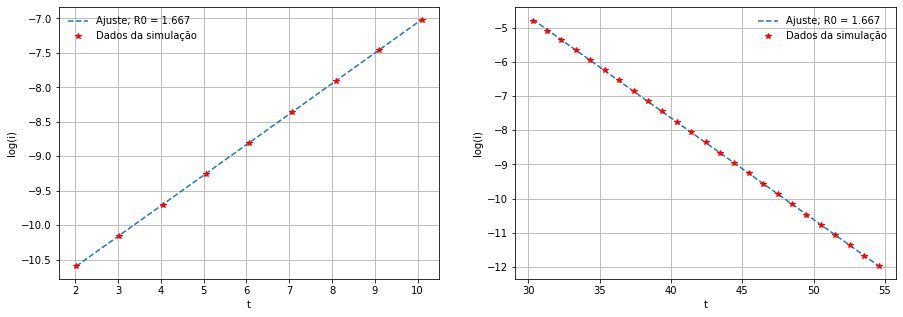

In [33]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]
    

In [35]:
# R0 = 1.778

R0 = 1.778
curva = 7



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_778 = 2
T_sub_1_778 = 9

arr_sub = lista[curva][0][T0_sub_1_778:T_sub_1_778]

arr_t_sub = t_discreto[T0_sub_1_778:T_sub_1_778]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_778 = 25
T_des_1_778 = 45

arr_des = lista[curva][0][T0_des_1_778:T_des_1_778]

arr_t_des = t_discreto[T0_des_1_778:T_des_1_778]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

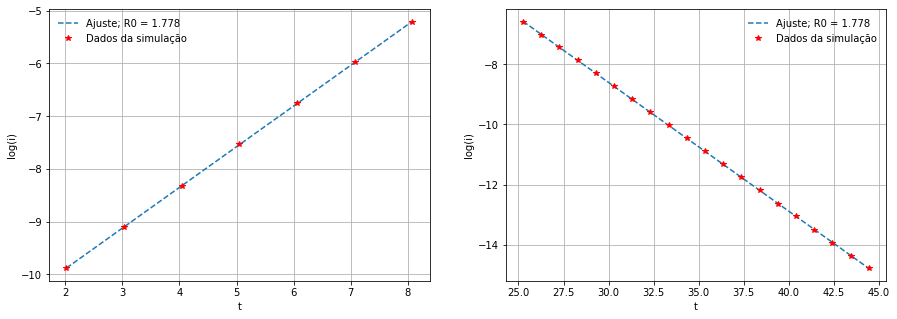

In [36]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

In [ ]:
# R0 = 1.889

R0 = 1.889
curva = 8



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_1_889 = 1
T_sub_1_889 = 8

arr_sub = lista[curva][0][T0_sub_1_889:T_sub_1_889]

arr_t_sub = t_discreto[T0_sub_1_889:T_sub_1_889]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_1_889 = 20
T_des_1_889 = 40

arr_des = lista[curva][0][T0_des_1_889:T_des_1_889]

arr_t_des = t_discreto[T0_des_1_889:T_des_1_889]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

In [ ]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

In [37]:
# R0 = 2.0

R0 = 2.0
curva = 9



# Encontrando o coeficiente da subida.


# Valores coletados pessoalmente

T0_sub_2 = 1
T_sub_2 = 7

arr_sub = lista[curva][0][T0_sub_2:T_sub_2]

arr_t_sub = t_discreto[T0_sub_2:T_sub_2]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])



# Encontrando o coeficiente da descida.


# Valores coletados pessoalmente

T0_des_2 = 20
T_des_2 = 40

arr_des = lista[curva][0][T0_des_2:T_des_2]

arr_t_des = t_discreto[T0_des_2:T_des_2]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

[Text(0, 0.5, 'log(i)'), Text(0, 0.5, 'log(i)')]

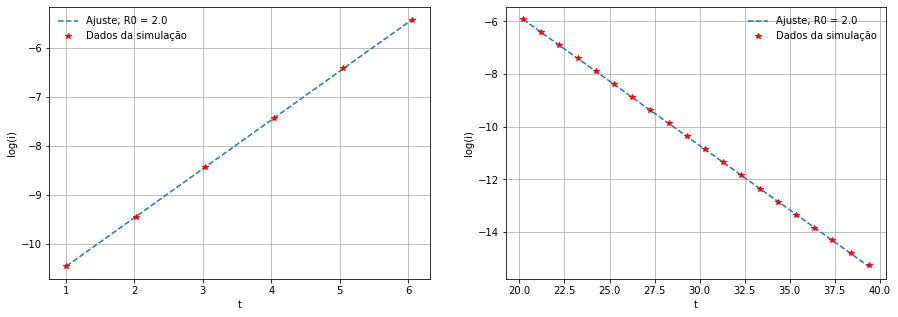

In [38]:
# Prova

fig, bx = plt.subplots(figsize=(15,5), ncols=2)

bx[0].plot(arr_t_sub, (a_sub + arr_t_sub * b_sub),'--' , label=f'Ajuste; R0 = {R0}')
bx[0].plot(arr_t_sub, arr_sub, '*r', label='Dados da simulação')

bx[1].plot(arr_t_des, (a_des + arr_t_des * b_des),'--' , label=f'Ajuste; R0 = {R0}')
bx[1].plot(arr_t_des, arr_des, '*r', label='Dados da simulação')

[bx[i].legend(frameon=False) for i in range(0,2)]
[bx[i].grid(True) for i in range(0,2)]
[bx[i].set_xlabel('t') for i in range(0,2)]
[bx[i].set_ylabel('log(i)') for i in range(0,2)]

# Agrupando e concluíndo

In [79]:
lista_coef_R0_subida = []
lista_coef_R0_descida = []


##  R0 = 1.0 => inclinação = 0

R0 = 1.0
curva = 0
b_sub = b_des = 0

lista_coef_R0_subida.append([b_sub,R0])
lista_coef_R0_descida.append([b_des,R0])



##  R0 = 1.111

R0 = 1.111
curva = 1


# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_111 = 5
T_sub_1_111 = 21

arr_sub = lista[curva][0][T0_sub_1_111:T_sub_1_111]

arr_t_sub = t_discreto[T0_sub_1_111:T_sub_1_111]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_111 = 85
T_des_1_111 = 98

arr_des = lista[1][0][T0_des_1_111:T_des_1_111]

arr_t_des = t_discreto[T0_des_1_111:T_des_1_111]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 1.222

R0 = 1.222
curva = 2

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_222 = 5
T_sub_1_222 = 21

arr_sub = lista[curva][0][T0_sub_1_222:T_sub_1_222]

arr_t_sub = t_discreto[T0_sub_1_222:T_sub_1_222]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_222 = 60
T_des_1_222 = 85

arr_des = lista[curva][0][T0_des_1_222:T_des_1_222]

arr_t_des = t_discreto[T0_des_1_222:T_des_1_222]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 1.333

R0 = 1.333
curva = 3

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_333 = 5
T_sub_1_333 = 19

arr_sub = lista[curva][0][T0_sub_1_333:T_sub_1_333]

arr_t_sub = t_discreto[T0_sub_1_333:T_sub_1_333]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_333 = 50
T_des_1_333 = 80

arr_des = lista[curva][0][T0_des_1_333:T_des_1_333]

arr_t_des = t_discreto[T0_des_1_333:T_des_1_333]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 1.444

R0 = 1.444
curva = 4

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_444 = 3
T_sub_1_444 = 15

arr_sub = lista[curva][0][T0_sub_1_444:T_sub_1_444]

arr_t_sub = t_discreto[T0_sub_1_444:T_sub_1_444]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_444 = 35
T_des_1_444 = 60

arr_des = lista[curva][0][T0_des_1_444:T_des_1_444]

arr_t_des = t_discreto[T0_des_1_444:T_des_1_444]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 1.556

R0 = 1.556
curva = 5

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_556 = 2
T_sub_1_556 = 11

arr_sub = lista[curva][0][T0_sub_1_556:T_sub_1_556]

arr_t_sub = t_discreto[T0_sub_1_556:T_sub_1_556]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_556 = 30
T_des_1_556 = 55

arr_des = lista[curva][0][T0_des_1_556:T_des_1_556]

arr_t_des = t_discreto[T0_des_1_556:T_des_1_556]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 1.667

R0 = 1.667
curva = 6

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_667 = 2
T_sub_1_667 = 11

arr_sub = lista[curva][0][T0_sub_1_667:T_sub_1_667]

arr_t_sub = t_discreto[T0_sub_1_667:T_sub_1_667]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_667 = 30
T_des_1_667 = 55

arr_des = lista[curva][0][T0_des_1_667:T_des_1_667]

arr_t_des = t_discreto[T0_des_1_667:T_des_1_667]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



# R0 = 1.778

R0 = 1.778
curva = 7

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_778 = 2
T_sub_1_778 = 9

arr_sub = lista[curva][0][T0_sub_1_778:T_sub_1_778]

arr_t_sub = t_discreto[T0_sub_1_778:T_sub_1_778]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_778 = 25
T_des_1_778 = 45

arr_des = lista[curva][0][T0_des_1_778:T_des_1_778]

arr_t_des = t_discreto[T0_des_1_778:T_des_1_778]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 1.889

R0 = 1.889
curva = 8

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_1_889 = 1
T_sub_1_889 = 8

arr_sub = lista[curva][0][T0_sub_1_889:T_sub_1_889]

arr_t_sub = t_discreto[T0_sub_1_889:T_sub_1_889]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_1_889 = 20
T_des_1_889 = 40

arr_des = lista[curva][0][T0_des_1_889:T_des_1_889]

arr_t_des = t_discreto[T0_des_1_889:T_des_1_889]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])



## R0 = 2.0

R0 = 2.0
curva = 9

# Encontrando o coeficiente da subida.

# Valores coletados pessoalmente

T0_sub_2 = 1
T_sub_2 = 7

arr_sub = lista[curva][0][T0_sub_2:T_sub_2]

arr_t_sub = t_discreto[T0_sub_2:T_sub_2]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_sub,arr_sub, 1)
a_sub, b_sub = coef1.convert().coef

lista_coef_R0_subida.append([b_sub,R0])

# Encontrando o coeficiente da descida.

# Valores coletados pessoalmente

T0_des_2 = 20
T_des_2 = 40

arr_des = lista[curva][0][T0_des_2:T_des_2]

arr_t_des = t_discreto[T0_des_2:T_des_2]

coef1 = np.polynomial.polynomial.Polynomial.fit(arr_t_des,arr_des, 1)
a_des, b_des = coef1.convert().coef

lista_coef_R0_descida.append([b_des,R0])

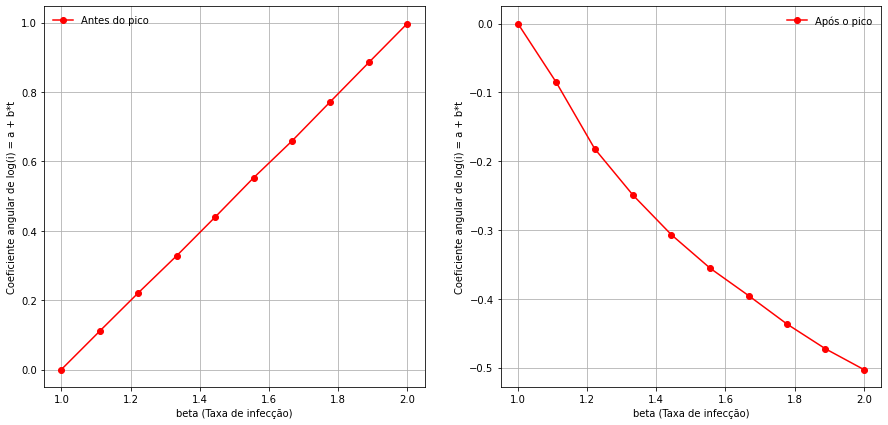

In [90]:
b_subida = []
b_descida = []
R0_eixo = []
[b_subida.append(lista_coef_R0_subida[i][0]) for i in range(0,10)]
[b_descida.append(lista_coef_R0_descida[i][0]) for i in range(0,10)]
[R0_eixo.append(lista_coef_R0_subida[i][1]) for i in range(0,10)]

fig, ax = plt.subplots(figsize=(15,7), ncols=2)
ax[0].plot(R0_eixo, b_subida, '-or', label='Antes do pico')
ax[1].plot(R0_eixo, b_descida, '-or', label='Após o pico')

for i in range(0,2):
    ax[i].grid(True)
    ax[i].legend(frameon=False)
    ax[i].set_xlabel('beta (Taxa de infecção)')
    ax[i].set_ylabel('Coeficiente angular de log(i) = a + b*t')
plt.savefig('coef_angular_versus_R0.png')